In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/home/federico/Università/Tesi_magistrale/my_programs/')

from contact_matrix_utils import *
import settings
from src.slice_pairwise import *
from src.interchromosomal_cosegregation import *
from numpy.random import Generator, MT19937
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
save_folder = "/home/federico/Università/Tesi_magistrale/images/7_interPI_olfr.ipynb/"

In [3]:
def chromosome_bin_lenght(segregation_table, chrom):
    return np.ceil(segregation_table[chrom]['stop_position'][-1]/resolution).astype(int)

def select_chromosomes_coordinates(chrA, chrB, chr_windows_sizes):
    if(chrA==0 or chrB ==0):
        print("0 is not accepted as chromosome index ")
        return

    chrA_idx, chrB_idx = chrA - 1, chrB - 1

    if(chrA_idx>chrB_idx):
        chrA_idx, chrB_idx = chrB_idx, chrA_idx

    start_row    = np.sum(chr_windows_sizes[:chrA_idx])
    stop_row     = start_row + chr_windows_sizes[chrA_idx]
    start_column = np.sum(chr_windows_sizes[:chrB_idx])
    stop_column  = start_column + chr_windows_sizes[chrB_idx]

    return start_row, stop_row, start_column, stop_column

which_beta = "$\\beta$ evaluated | 1/2"

# segregation table import #

In [4]:
name_root_1NP_150kb = "mesc_46C_150kb_481x1"
name_root_iza_150kb = "iza-mesc_150kb_420x3"
name_root_dopa_150kb = "dopa30_150kb_482x3"

path_1 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_1NP_150kb + "/"
file_name_1 = "segregation_" + name_root_1NP_150kb +  ".pkl"
with open(path_1 + file_name_1, 'rb') as f:
    segregation_table_1NP_150kb = pickle.load(f)

path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_iza_150kb + "/"
file_name_2 = "segregation_" + name_root_iza_150kb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f:
    segregation_table_iza_150kb = pickle.load(f)

path_3 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_dopa_150kb + "/"
file_name_3 = "segregation_" + name_root_dopa_150kb +  ".pkl"
with open(path_3 + file_name_3, 'rb') as f:
    segregation_table_dopa_150kb = pickle.load(f)

start_chr, stop_chr = 1, 19
stop_chr += 1
chromosomes = []
n_chromosomes = stop_chr - start_chr

l = []
size = 0

for i in range(start_chr, stop_chr):
    chrA = 'chr' + str(i)
    chromosomes += [chrA]
    s = segregation_table_1NP_150kb[chrA]['segregation_table'].shape[0]
    size += s
    l.append(s) 

chr_windows_sizes = np.array(l)

# Cosegregations of chr2 and chr14 #

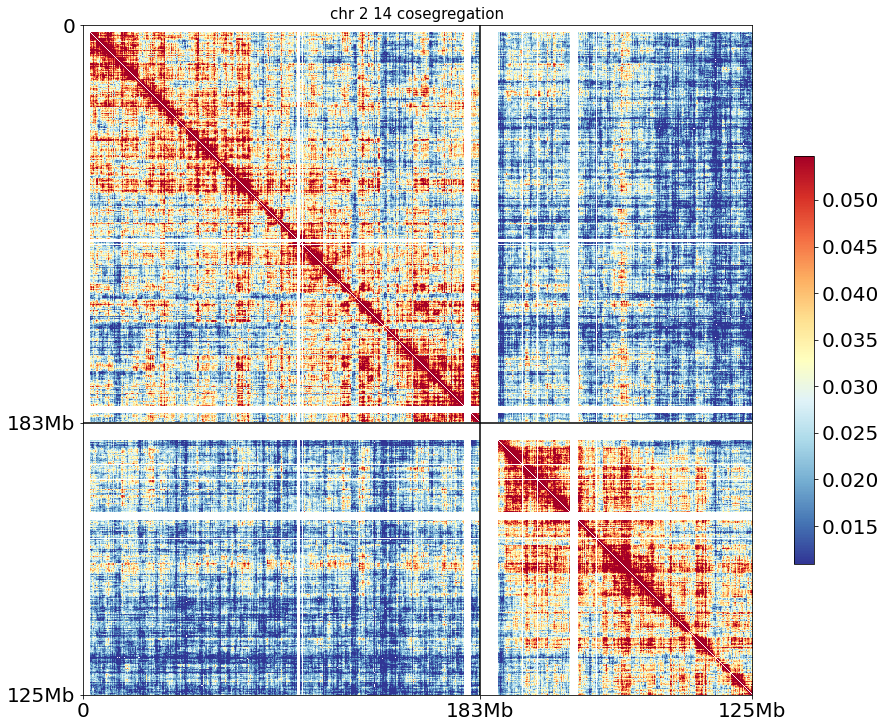

In [5]:
chr2_1NP_150kb_coseg = compute_tube_cosegregation_matrix(segregation_table_1NP_150kb['chr2']['segregation_table'])
chr14_1NP_150kb_coseg = compute_tube_cosegregation_matrix(segregation_table_1NP_150kb['chr14']['segregation_table'])
chr2_14_1NP_150kb_coseg = compute_tube_cosegregation_matrix_offdiag(segregation_table_1NP_150kb['chr2']['segregation_table'], segregation_table_1NP_150kb['chr14']['segregation_table'])

chr2_1NP_150kb_coseg[chr2_1NP_150kb_coseg == 0] = np.nan
chr14_1NP_150kb_coseg[chr14_1NP_150kb_coseg == 0] = np.nan
chr2_14_1NP_150kb_coseg[chr2_14_1NP_150kb_coseg == 0] = np.nan

plot_heatmap_two_chromosomes(chr2_1NP_150kb_coseg, chr14_1NP_150kb_coseg, chr2_14_1NP_150kb_coseg, colormap = "RdYlBu_r", title = "chr 2 14 cosegregation", resolution=150E3);


# NPMI of chr2 and chr14 #

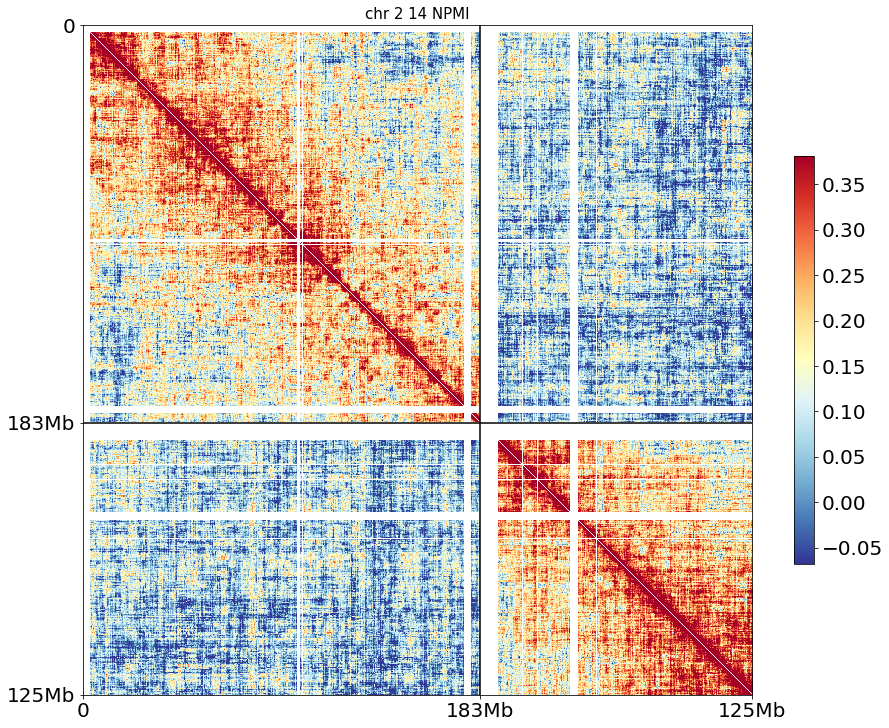

In [6]:
with warnings.catch_warnings():

    warnings.filterwarnings("ignore", "divide by zero encountered in log", category=RuntimeWarning)   
    warnings.filterwarnings("ignore", "invalid value encountered in true_divide", category=RuntimeWarning)    
    chr2_1NP_150kb_npmi = compute_npmi(segregation_table_1NP_150kb['chr2']['segregation_table'])
    chr14_1NP_150kb_npmi = compute_npmi(segregation_table_1NP_150kb['chr14']['segregation_table'])
    chr2_14_1NP_150kb_npmi = compute_npmi_inter(segregation_table_1NP_150kb['chr2']['segregation_table'], segregation_table_1NP_150kb['chr14']['segregation_table'])


    plot_heatmap_two_chromosomes(chr2_1NP_150kb_npmi, chr14_1NP_150kb_npmi, chr2_14_1NP_150kb_npmi, colormap = "RdYlBu_r", title = "chr 2 14 NPMI", resolution=150E3);

# $\pi$ #

In [7]:
chr2_1NP_150kb_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/mesc_46C_150kb_481x1/PI2/PI2_chr2_mesc_46C_150kb_481x1.txt"))
chr2_iza_150kb_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/iza-mesc_150kb_420x3/PI2/PI2_chr2_iza-mesc_150kb_420x3.txt"))
chr2_dopa_150kb_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/dopa30_150kb_482x3/PI2/PI2_chr2_dopa30_150kb_482x3.txt"))

chr14_1NP_150kb_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/mesc_46C_150kb_481x1/PI2/PI2_chr14_mesc_46C_150kb_481x1.txt"))
chr14_iza_150kb_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/iza-mesc_150kb_420x3/PI2/PI2_chr14_iza-mesc_150kb_420x3.txt"))
chr14_dopa_150kb_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/dopa30_150kb_482x3/PI2/PI2_chr14_dopa30_150kb_482x3.txt"))

chr2_1NP_150kb_sign_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/mesc_46C_150kb_481x1/PI2/PI2_significant_95_chr2_mesc_46C_150kb_481x1.txt"))
chr2_iza_150kb_sign_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/iza-mesc_150kb_420x3/PI2/PI2_significant_95_chr2_iza-mesc_150kb_420x3.txt"))
chr2_dopa_150kb_sign_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/dopa30_150kb_482x3/PI2/PI2_significant_95_chr2_dopa30_150kb_482x3.txt"))

chr14_1NP_150kb_sign_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/mesc_46C_150kb_481x1/PI2/PI2_significant_95_chr14_mesc_46C_150kb_481x1.txt"))
chr14_iza_150kb_sign_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/iza-mesc_150kb_420x3/PI2/PI2_significant_95_chr14_iza-mesc_150kb_420x3.txt"))
chr14_dopa_150kb_sign_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/dopa30_150kb_482x3/PI2/PI2_significant_95_chr14_dopa30_150kb_482x3.txt"))

for i in [chr2_1NP_150kb_pi, chr2_iza_150kb_pi, chr2_dopa_150kb_pi, chr14_1NP_150kb_pi, chr14_iza_150kb_pi, chr14_dopa_150kb_pi, chr2_1NP_150kb_sign_pi, chr2_iza_150kb_sign_pi, chr2_dopa_150kb_sign_pi, chr14_1NP_150kb_sign_pi,
    chr14_iza_150kb_sign_pi, chr14_dopa_150kb_sign_pi]:
    np.fill_diagonal(i, np.nan)

chr2_14_1NP_150kb_pi  = np.load("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/mesc_46C_150kb_481x1/PI2_inter_beta_evaluation/PI2_inter_chr2_chr14_mesc_46C_150kb_481x1.npy")
chr2_14_iza_150kb_pi  = np.load("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/iza-mesc_150kb_420x3/PI2_inter_beta_evaluation/PI2_inter_chr2_chr14_iza-mesc_150kb_420x3.npy")
chr2_14_dopa_150kb_pi = np.load("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/dopa30_150kb_482x3/PI2_inter_beta_evaluation/PI2_inter_chr2_chr14_dopa30_150kb_482x3.npy")

chr2_14_1NP_150kb_sign_pi  = np.load("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/mesc_46C_150kb_481x1/PI2_inter_beta_evaluation/PI2_inter_significant_95_chr2_chr14_mesc_46C_150kb_481x1.npy")
chr2_14_iza_150kb_sign_pi  = np.load("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/iza-mesc_150kb_420x3/PI2_inter_beta_evaluation/PI2_inter_significant_95_chr2_chr14_iza-mesc_150kb_420x3.npy")
chr2_14_dopa_150kb_sign_pi = np.load("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/dopa30_150kb_482x3/PI2_inter_beta_evaluation/PI2_inter_significant_95_chr2_chr14_dopa30_150kb_482x3.npy")

In [8]:
fig1, _, _ = plot_heatmap_two_chromosomes(chr2_1NP_150kb_pi, chr14_1NP_150kb_pi, chr2_14_1NP_150kb_pi, colormap = "RdYlBu_r", title = "chr 2 14 pi 1NP", resolution=150E3);
fig2, _, _ = plot_heatmap_two_chromosomes(chr2_iza_150kb_pi, chr14_iza_150kb_pi, chr2_14_iza_150kb_pi, colormap = "RdYlBu_r", title = "chr 2 14 pi iza", resolution=150E3);
fig3, _, _ = plot_heatmap_two_chromosomes(chr2_dopa_150kb_pi, chr14_dopa_150kb_pi, chr2_14_dopa_150kb_pi, colormap = "RdYlBu_r", title = "chr 2 14 pi dopa", resolution=150E3)

fig1.savefig(save_folder + "pi/" +  'chr2_14_1NP_150kb_pi.svg' , format = 'svg', dpi = 300)
fig2.savefig(save_folder + "pi/" +  'chr2_14_iza_150kb_pi.svg' , format = 'svg', dpi = 300)
fig3.savefig(save_folder + "pi/" +  'chr2_14_dopa_150kb_pi.svg' , format = 'svg', dpi = 300)

plt.close(fig1)
plt.close(fig2)
plt.close(fig3)

del fig1, fig2, fig3

In [9]:
fig1, _, _ = plot_heatmap_two_chromosomes(chr2_1NP_150kb_sign_pi, chr14_1NP_150kb_sign_pi, chr2_14_1NP_150kb_sign_pi, colormap = "RdYlBu_r", title = "chr 2 14 sign pi 1NP", resolution=150E3);
fig2, _, _ = plot_heatmap_two_chromosomes(chr2_iza_150kb_sign_pi, chr14_iza_150kb_sign_pi, chr2_14_iza_150kb_sign_pi, colormap = "RdYlBu_r", title = "chr 2 14 sign pi iza", resolution=150E3);
fig3, _, _ = plot_heatmap_two_chromosomes(chr2_dopa_150kb_sign_pi, chr14_dopa_150kb_sign_pi, chr2_14_dopa_150kb_sign_pi, colormap = "RdYlBu_r", title = "chr 2 14 sign pi dopa", resolution=150E3)

fig1.savefig(save_folder + "sign_pi/" +  'chr2_14_1NP_150kb_sign_pi.svg' , format = 'svg', dpi = 300)
fig2.savefig(save_folder + "sign_pi/" +  'chr2_14_iza_150kb_sign_pi.svg' , format = 'svg', dpi = 300)
fig3.savefig(save_folder + "sign_pi/" +  'chr2_14_dopa_150kb_sign_pi.svg' , format = 'svg', dpi = 300)

plt.close(fig1)
plt.close(fig2)
plt.close(fig3)

del fig1, fig2, fig3

In [13]:
fig1, _, _, _ = plot_heatmap(chr2_14_1NP_150kb_pi, colormap="RdYlBu_r", title= "chr2 14 1NP 150kb pi")
fig2, _, _, _ = plot_heatmap(chr2_14_iza_150kb_pi, colormap="RdYlBu_r", title= "chr2 14 iza 150kb pi")
fig3, _, _, _ = plot_heatmap(chr2_14_dopa_150kb_pi, colormap="RdYlBu_r", title= "chr2 14 dopa 150kb pi")

fig1.savefig(save_folder + "inter_pi/" +  'chr2_14_1NP_150kb_pi.svg' , format = 'svg', dpi = 300)
fig2.savefig(save_folder + "inter_pi/" +  'chr2_14_iza_150kb_pi.svg' , format = 'svg', dpi = 300)
fig3.savefig(save_folder + "inter_pi/" +  'chr2_14_dopa_150kb_pi.svg' , format = 'svg', dpi = 300)

plt.close(fig1)
plt.close(fig2)
plt.close(fig3)

del fig1, fig2, fig3

In [14]:
fig1, _, _, _ = plot_heatmap(chr2_14_1NP_150kb_sign_pi, colormap="RdYlBu_r", title= "chr2 14 1NP 150kb sign pi")
fig2, _, _, _ = plot_heatmap(chr2_14_iza_150kb_sign_pi, colormap="RdYlBu_r", title= "chr2 14 iza 150kb sign pi")
fig3, _, _, _ = plot_heatmap(chr2_14_dopa_150kb_sign_pi, colormap="RdYlBu_r", title= "chr2 14 dopa 150kb sign pi")

fig1.savefig(save_folder + "inter_sign_pi/" +  'chr2_14_1NP_150kb_sign_pi.svg' , format = 'svg', dpi = 300)
fig2.savefig(save_folder + "inter_sign_pi/" +  'chr2_14_iza_150kb_sign_pi.svg' , format = 'svg', dpi = 300)
fig3.savefig(save_folder + "inter_sign_pi/" +  'chr2_14_dopa_150kb_sign_pi.svg' , format = 'svg', dpi = 300)

plt.close(fig1)
plt.close(fig2)
plt.close(fig3)

del fig1, fig2, fig3

# chr2:85-91Mb chr14:49-52Mb  #

In [15]:
chr2_detail_start = 506
chr2_detail_end = 607

chr14_detail_start = 326
chr14_detail_end = 346


In [20]:
20*150E3/1E6

3.0

In [17]:
fig1, _, _, _ = plot_heatmap(chr2_14_1NP_150kb_pi[chr2_detail_start:chr2_detail_end, chr14_detail_start:chr14_detail_end], colormap="RdYlBu_r", title= "chr2 14 1NP 150kb pi")
fig2, _, _, _ = plot_heatmap(chr2_14_iza_150kb_pi[chr2_detail_start:chr2_detail_end, chr14_detail_start:chr14_detail_end], colormap="RdYlBu_r", title= "chr2 14 iza 150kb pi")
fig3, _, _, _ = plot_heatmap(chr2_14_dopa_150kb_pi[chr2_detail_start:chr2_detail_end, chr14_detail_start:chr14_detail_end], colormap="RdYlBu_r", title= "chr2 14 dopa 150kb pi")

fig1.savefig(save_folder + "inter_pi_chr2:85-91Mb_chr14:49-52Mb/" +  'chr2_14_1NP_150kb_pi_chr2:85-91Mb_chr14:49-52Mb.svg' , format = 'svg', dpi = 300)
fig2.savefig(save_folder + "inter_pi_chr2:85-91Mb_chr14:49-52Mb/" +  'chr2_14_iza_150kb_pi_chr2:85-91Mb_chr14:49-52Mb.svg' , format = 'svg', dpi = 300)
fig3.savefig(save_folder + "inter_pi_chr2:85-91Mb_chr14:49-52Mb/" +  'chr2_14_dopa_150kb_pi_chr2:85-91Mb_chr14:49-52Mb.svg' , format = 'svg', dpi = 300)

plt.close(fig1)
plt.close(fig2)
plt.close(fig3)

del fig1, fig2, fig3

In [18]:
fig1, _, _, _ = plot_heatmap(chr2_14_1NP_150kb_sign_pi[chr2_detail_start:chr2_detail_end, chr14_detail_start:chr14_detail_end], colormap="RdYlBu_r", title= "chr2 14 1NP 150kb sign pi")
fig2, _, _, _ = plot_heatmap(chr2_14_iza_150kb_sign_pi[chr2_detail_start:chr2_detail_end, chr14_detail_start:chr14_detail_end], colormap="RdYlBu_r", title= "chr2 14 iza 150kb sign pi")
fig3, _, _, _ = plot_heatmap(chr2_14_dopa_150kb_sign_pi[chr2_detail_start:chr2_detail_end, chr14_detail_start:chr14_detail_end], colormap="RdYlBu_r", title= "chr2 14 dopa 150kb sign pi")

fig1.savefig(save_folder + "inter_sign_pi_chr2:85-91Mb_chr14:49-52Mb/" +  'chr2_14_1NP_150kb_sign_pi_chr2:85-91Mb_chr14:49-52Mb.svg' , format = 'svg', dpi = 300)
fig2.savefig(save_folder + "inter_sign_pi_chr2:85-91Mb_chr14:49-52Mb/" +  'chr2_14_iza_150kb_sign_pi_chr2:85-91Mb_chr14:49-52Mb.svg' , format = 'svg', dpi = 300)
fig3.savefig(save_folder + "inter_sign_pi_chr2:85-91Mb_chr14:49-52Mb/" +  'chr2_14_dopa_150kb_sign_pi_chr2:85-91Mb_chr14:49-52Mb.svg' , format = 'svg', dpi = 300)

plt.close(fig1)
plt.close(fig2)
plt.close(fig3)

del fig1, fig2, fig3

## NPMI ##

In [ ]:
with warnings.catch_warnings():

    warnings.filterwarnings("ignore", "divide by zero encountered in log", category=RuntimeWarning)   
    warnings.filterwarnings("ignore", "invalid value encountered in true_divide", category=RuntimeWarning)   

    chr2_1NP_150kb_npmi = compute_npmi(segregation_table_1NP_150kb['chr2']['segregation_table'])
    chr14_1NP_150kb_npmi = compute_npmi(segregation_table_1NP_150kb['chr14']['segregation_table'])
    chr2_14_1NP_150kb_npmi = compute_npmi_inter(segregation_table_1NP_150kb['chr2']['segregation_table'], segregation_table_1NP_150kb['chr14']['segregation_table'])


    fig1, _, _ = plot_heatmap_two_chromosomes(chr2_1NP_150kb_npmi, chr14_1NP_150kb_npmi, chr2_14_1NP_150kb_npmi, colormap = "RdYlBu_r", title = "chr 2 14 NPMI 1NP", resolution=150E3);

    chr2_iza_150kb_npmi = compute_npmi(segregation_table_iza_150kb['chr2']['segregation_table'])
    chr14_iza_150kb_npmi = compute_npmi(segregation_table_iza_150kb['chr14']['segregation_table'])
    chr2_14_iza_150kb_npmi = compute_npmi_inter(segregation_table_iza_150kb['chr2']['segregation_table'], segregation_table_iza_150kb['chr14']['segregation_table'])


    fig2, _, _ = plot_heatmap_two_chromosomes(chr2_iza_150kb_npmi, chr14_iza_150kb_npmi, chr2_14_iza_150kb_npmi, colormap = "RdYlBu_r", title = "chr 2 14 NPMI iza", resolution=150E3);

    chr2_dopa_150kb_npmi = compute_npmi(segregation_table_dopa_150kb['chr2']['segregation_table'])
    chr14_dopa_150kb_npmi = compute_npmi(segregation_table_dopa_150kb['chr14']['segregation_table'])
    chr2_14_dopa_150kb_npmi = compute_npmi_inter(segregation_table_dopa_150kb['chr2']['segregation_table'], segregation_table_dopa_150kb['chr14']['segregation_table'])


    fig3, _, _ = plot_heatmap_two_chromosomes(chr2_dopa_150kb_npmi, chr14_dopa_150kb_npmi, chr2_14_dopa_150kb_npmi, colormap = "RdYlBu_r", title = "chr 2 14 NPMI dopa", resolution=150E3)

fig1.savefig(save_folder + "NPMI_full_chromosomes/" +  'chr2_14_1NP_150kb_npmi.svg' , format = 'svg', dpi = 300)
fig2.savefig(save_folder + "NPMI_full_chromosomes/" +  'chr2_14_iza_150kb_npmi.svg' , format = 'svg', dpi = 300)
fig3.savefig(save_folder + "NPMI_full_chromosomes/" +  'chr2_14_dopa_150kb_npmi.svg' , format = 'svg', dpi = 300)

plt.close(fig1)
plt.close(fig2)
plt.close(fig3)

del fig1, fig2, fig3

In [ ]:
fig1, _, _, _ = plot_heatmap(chr2_14_1NP_150kb_npmi, colormap="RdYlBu_r", title="chr2_14_1NP_150kb_npmi");
fig2, _, _, _ = plot_heatmap(chr2_14_iza_150kb_npmi, colormap="RdYlBu_r", title="chr2_14_iza_150kb_npmi");
fig3, _, _, _ = plot_heatmap(chr2_14_dopa_150kb_npmi, colormap="RdYlBu_r", title="chr2_14_dopa_150kb_npmi");

fig1.savefig(save_folder + "Inter_NPMI/" +  'chr2_14_1NP_150kb_npmi_inter.svg' , format = 'svg', dpi = 300)
fig2.savefig(save_folder + "Inter_NPMI/" +  'chr2_14_iza_150kb_npmi_inter.svg' , format = 'svg', dpi = 300)
fig3.savefig(save_folder + "Inter_NPMI/" +  'chr2_14_dopa_150kb_npmi_inter.svg' , format = 'svg', dpi = 300)

plt.close(fig1)
plt.close(fig2)
plt.close(fig3)

del fig1, fig2, fig3


# WDF #

In [ ]:
chr2_start, chr2_end, chr14_start, chr14_end = select_chromosomes_coordinates(2, 14, chr_windows_sizes)

In [ ]:
chr2_14_1NP_150kb_wdf = np.array([])
chr2_14_iza_150kb_wdf = np.array([])
chr2_14_dopa_150kb_wdf = np.array([])

chr_list = ["chr2","chr14"]

for chr in chr_list:
    F_arr = compute_tube_segregation_frequency(segregation_table_1NP_150kb[chr]["segregation_table"])
    chr2_14_1NP_150kb_wdf = np.concatenate((chr2_14_1NP_150kb_wdf, F_arr))
    del F_arr

    F_arr = compute_tube_segregation_frequency(segregation_table_iza_150kb[chr]["segregation_table"])
    chr2_14_iza_150kb_wdf = np.concatenate((chr2_14_iza_150kb_wdf, F_arr))
    del F_arr

    F_arr = compute_tube_segregation_frequency(segregation_table_dopa_150kb[chr]["segregation_table"])
    chr2_14_dopa_150kb_wdf = np.concatenate((chr2_14_dopa_150kb_wdf, F_arr))
    del F_arr

chr2_14_1NP_150kb_wdf = (chr2_14_1NP_150kb_wdf - np.nanmean(chr2_14_1NP_150kb_wdf))/np.nanstd(chr2_14_1NP_150kb_wdf)
chr2_14_iza_150kb_wdf = (chr2_14_iza_150kb_wdf - np.nanmean(chr2_14_iza_150kb_wdf))/np.nanstd(chr2_14_iza_150kb_wdf)
chr2_14_dopa_150kb_wdf = (chr2_14_dopa_150kb_wdf - np.nanmean(chr2_14_dopa_150kb_wdf))/np.nanstd(chr2_14_dopa_150kb_wdf)


In [ ]:
fig1, ax1 = plt.subplots(1, figsize = (10, 1))
fig2, ax2 = plt.subplots(1, figsize = (10, 1))
fig3, ax3 = plt.subplots(1, figsize = (10, 1))

ax1.plot(chr2_14_1NP_150kb_wdf,  linewidth = 0.5, color = "orange");     ax1.axvline(x= 0, color = "black");  ax1.axvline(x=chr2_end - chr2_start, color = "black");  ax1.axvline(x=chr2_end - chr2_start + chr14_end - chr14_start, color = "black");  ax1.set_title("chr2_14_1NP_150kb_wdf");
ax2.plot(chr2_14_iza_150kb_wdf,  linewidth = 0.5, color = "orange");     ax2.axvline(x= 0, color = "black");  ax2.axvline(x=chr2_end - chr2_start, color = "black");  ax2.axvline(x=chr2_end - chr2_start + chr14_end - chr14_start, color = "black");  ax2.set_title("chr2_14_iza_150kb_wdf");
ax3.plot(chr2_14_dopa_150kb_wdf, linewidth = 0.5, color = "orange");     ax3.axvline(x= 0, color = "black");  ax3.axvline(x=chr2_end - chr2_start, color = "black");  ax3.axvline(x=chr2_end - chr2_start + chr14_end - chr14_start, color = "black");  ax3.set_title("chr2_14_dopa_150kb_wdf");

ax1.fill_between(np.arange(0, chr2_14_1NP_150kb_wdf.shape[0], 1),  0, chr2_14_1NP_150kb_wdf, color = "orange")
ax2.fill_between(np.arange(0, chr2_14_iza_150kb_wdf.shape[0], 1),  0, chr2_14_iza_150kb_wdf, color = "orange")
ax3.fill_between(np.arange(0, chr2_14_dopa_150kb_wdf.shape[0], 1), 0, chr2_14_dopa_150kb_wdf, color = "orange")

fig1.savefig(save_folder + "WDF/" +  'chr2_14_1NP_150kb_wdf.svg' , format = 'svg', dpi = 300)
fig2.savefig(save_folder + "WDF/" +  'chr2_14_iza_150kb_wdf.svg' , format = 'svg', dpi = 300)
fig3.savefig(save_folder + "WDF/" +  'chr2_14_dopa_150kb_wdf.svg' , format = 'svg', dpi = 300)

plt.close(fig1)
plt.close(fig2)
plt.close(fig3)

del fig1, fig2, fig3, ax1, ax2, ax3